<a href="https://colab.research.google.com/github/mehmedkadric/mobility-company-data-analysis/blob/main/mobility_company_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mobility Company - Data Analysis


In [ ]:
!pip install pandas requests haversine

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/My Drive/Upwork/Yannik

/content/drive/My Drive/Upwork/Yannik


# Input Reader
The purpose of `CSVReader` class is to read and validate the input data.

In [ ]:
import os
import pandas as pd

class CSVReader:
    def __init__(self, folder_path):
        self.folder_path = folder_path
        self.file_data = {}
        self.header_consistent = True
        self.read_files()
        self.check_header_consistency()

    def read_files(self):
        # Read all CSV files in given folder_path
        for file_name in os.listdir(self.folder_path):
            if file_name.endswith('.csv'):
                file_path = os.path.join(self.folder_path, file_name)
                df = pd.read_csv(file_path)
                self.file_data[file_name] = df

    def check_header_consistency(self):
        # We expect all files to have the same header
        headers = set()
        for df in self.file_data.values():
            headers.add(tuple(df.columns))
        if len(headers) > 1:
            self.header_consistent = False

    def get_df(self):
        if not self.header_consistent:
            raise ValueError("Headers in CSV files are not consistent.")
        return pd.concat(self.file_data.values(), ignore_index=True)

In [ ]:
reader_a = CSVReader(folder_path='CompanyA/')
reader_b = CSVReader(folder_path='CompanyB/')

company_a = reader_a.get_df()
company_b = reader_b.get_df()

print(f"Record Count for Company A: {len(company_a)}")
print(f"Record Count for Company B: {len(company_b)}")

Record Count for Company A: 57365
Record Count for Company B: 10578


In [ ]:
# Company A data sample
company_a.head()

,TripID,ScooterID,StartTime,EndTime,StartLatitude,StartLongitude,EndLatitude,EndLongitude,TripDistance
0,0e56a534-66f4-448b-8eaa-beab76509955,5bc901d7-b714-4c57-a614-3d7193da825a,8/9/18 10:24,8/9/18 10:26,38.25,-85.76,38.25,-85.76,0.04
1,d9280fb0-8135-4750-9c71-c610789ba005,3d1905ec-85be-4773-9fe2-34421073363f,8/9/18 10:26,8/9/18 10:56,38.25,-85.74,38.26,-85.77,1.98
2,48fa27f3-3b19-4f0e-8665-ee0b188445fd,5bc901d7-b714-4c57-a614-3d7193da825a,8/9/18 10:26,8/9/18 10:35,38.25,-85.76,38.25,-85.76,0.06
3,6321b580-9055-4418-8c17-1d39a4d49027,4d49088f-4038-4dfb-9d55-e58a157d56d5,8/9/18 10:37,8/9/18 10:56,38.25,-85.74,38.26,-85.77,1.85
4,d05bf0bb-f6ee-489e-a32c-a93e15b626f8,e398ff1b-5d6b-4f15-b493-a988c7ab07b6,8/9/18 10:41,8/9/18 10:47,38.26,-85.75,38.26,-85.76,0.35


In [ ]:
# Company B data sample
company_b.head()

,trip_id,start_time,completed_time,distance_meters,start_latitude,start_longitude,end_latitude,end_longitude
0,26559444,2018-12-02T12:41:26.000+00:00,2018-12-02T12:45:40.000+00:00,382,38.23,-85.75,38.23,-85.76
1,26559031,2018-12-02T12:39:24.000+00:00,2018-12-02T12:41:49.000+00:00,109,38.26,-85.75,38.26,-85.76
2,26552748,2018-12-02T12:08:07.000+00:00,2018-12-02T12:18:29.000+00:00,2547,38.21,-85.75,38.23,-85.75
3,26559594,2018-12-02T12:42:16.000+00:00,2018-12-02T12:56:58.000+00:00,1575,38.26,-85.76,38.26,-85.76
4,26557132,2018-12-02T12:30:01.000+00:00,2018-12-02T12:48:30.000+00:00,37,38.22,-85.75,38.23,-85.76


# Conclusion 1
*   Latitude and Longitude values are not precise in both datasets
*   Time format is different, but standardized

In [ ]:
company_a.describe()

,StartLatitude,StartLongitude,EndLatitude,EndLongitude,TripDistance
count,57365.00000,57365.000000,57364.000000,57364.000000,5.736500e+04
mean,38.24342,-85.745516,38.241914,-85.745865,1.491247e+02
std,0.01614,0.020405,0.172975,0.433992,1.352164e+04
min,38.10000,-85.900000,0.000000,-122.420000,-1.034441e+04
25%,38.23000,-85.760000,38.230000,-85.760000,2.900000e-01
50%,38.25000,-85.750000,38.250000,-85.750000,7.500000e-01
75%,38.26000,-85.740000,38.260000,-85.740000,1.740000e+00
max,38.34000,-85.490000,41.300000,0.000000,1.334378e+06


In [ ]:
company_b.describe()

,trip_id,distance_meters,start_latitude,start_longitude,end_latitude,end_longitude
count,1.057800e+04,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000
mean,3.250132e+07,1486.692759,38.233344,-85.753961,38.232768,-85.738549
std,3.244806e+06,2203.422186,0.018315,0.014404,0.286526,1.587107
min,2.626508e+07,0.000000,38.090000,-85.810000,19.420000,-121.890000
25%,2.977741e+07,479.000000,38.220000,-85.760000,38.220000,-85.760000
50%,3.303032e+07,913.000000,38.230000,-85.760000,38.230000,-85.760000
75%,3.500597e+07,1754.000000,38.250000,-85.750000,38.250000,-85.750000
max,3.760439e+07,100000.000000,38.320000,-85.560000,48.860000,2.360000


# Conclusion 2

## Company A
*   *EndLatitude* and *EndLongitude* fields in Company A data have `0` as min value which can lead to potential geometry issue
*   *TripDistance* field has suspicious values

## Company B
*   *distance_meters* field has suspicious values (max value is 100 km which is a bit strange for a scooter)

In [ ]:
for col in company_a.columns:
    print(f"=========={col}==========")
    print(company_a[col].astype(object).describe())

==========TripID==========
count                                    57365
unique                                   57365
top       0e56a534-66f4-448b-8eaa-beab76509955
freq                                         1
Name: TripID, dtype: object
==========ScooterID==========
count                                    57365
unique                                     858
top       10ca2612-4b86-4348-ae19-f234d7a0be0a
freq                                       300
Name: ScooterID, dtype: object
==========StartTime==========
count            57365
unique           40304
top       9/3/18 13:41
freq                11
Name: StartTime, dtype: object
==========EndTime==========
count             57365
unique            38922
top       8/18/18 18:47
freq                 10
Name: EndTime, dtype: object
==========StartLatitude==========
count     57365.00
unique       20.00
top          38.25
freq      19738.00
Name: StartLatitude, dtype: float64
==========StartLongitude==========
count     57365.00
un

In [ ]:
for col in company_b.columns:
    print(f"=========={col}==========")
    print(company_b[col].astype(object).describe())

==========trip_id==========
count        10578
unique       10578
top       26559444
freq             1
Name: trip_id, dtype: int64
==========start_time==========
count                             10578
unique                            10537
top       2018-12-14T20:30:00.000+00:00
freq                                  2
Name: start_time, dtype: object
==========completed_time==========
count                             10578
unique                            10513
top       2018-12-30T20:24:35.000+00:00
freq                                  3
Name: completed_time, dtype: object
==========distance_meters==========
count     10578
unique     3640
top           0
freq        376
Name: distance_meters, dtype: int64
==========start_latitude==========
count     10578.00
unique       14.00
top          38.22
freq       3616.00
Name: start_latitude, dtype: float64
==========start_longitude==========
count     10578.00
unique       20.00
top         -85.76
freq       7050.00
Name: start_longit

# Conclusion 4


*   *TripID* (Company A) and *trip_id* (Company B) are unique ID fields

* There are 858 different Scooters Company A operates with


In [ ]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
months_order = ["Aug", "Sep", "Oct", "Nov", "Dec"]

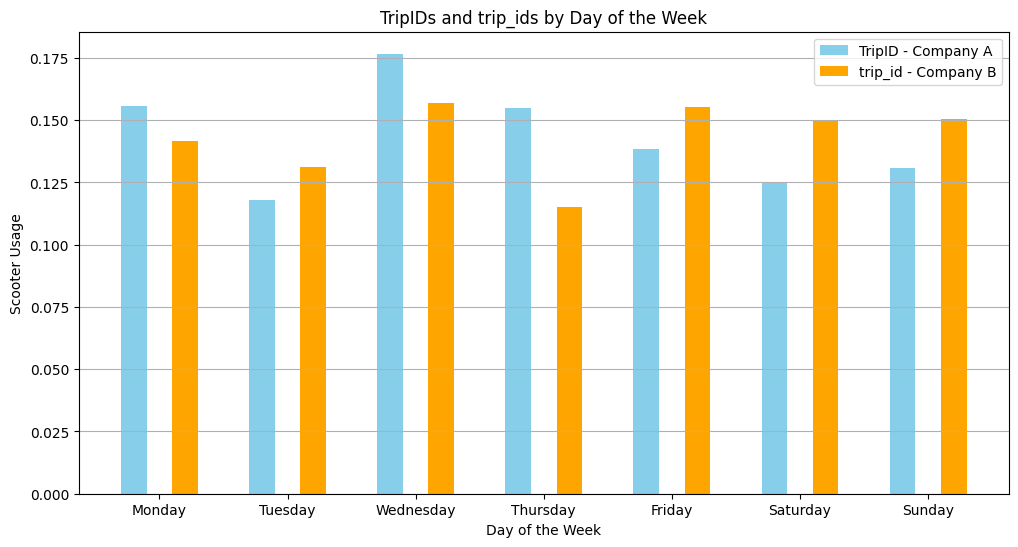

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'StartTime' is in datetime format, if not, convert it using:
company_a['StartTime'] = pd.to_datetime(company_a['StartTime'], format='%m/%d/%y %H:%M')
company_b['start_time'] = pd.to_datetime(company_b['start_time'])

# Extracting the day of the week from the 'StartTime' column
company_a['DayOfWeek'] = company_a['StartTime'].dt.day_name()
company_b['DayOfWeek'] = company_b['start_time'].dt.day_name()

# Grouping by day of the week and counting the number of ScooterIDs for each day
daily_counts_by_day_a = company_a.groupby('DayOfWeek')['TripID'].count() * 1.0 / len(company_a)
daily_counts_by_day_b = company_b.groupby('DayOfWeek')['trip_id'].count() * 1.0 / len(company_b)

# Creating a figure
fig, ax = plt.subplots(figsize=(12, 6))

# Width of the bars
bar_width = 0.2

# Plotting for Company A
ax.bar(np.arange(len(days_order)) - bar_width, daily_counts_by_day_a, width=bar_width, label='TripID - Company A', color='skyblue')

# Plotting for Company B
ax.bar(np.arange(len(days_order)) + bar_width, daily_counts_by_day_b, width=bar_width, label='trip_id - Company B', color='orange')

# Adjusting labels and title
ax.set_title('TripIDs and trip_ids by Day of the Week')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Scooter Usage')  # Normalized TripID/trip_id frequency
ax.set_xticks(np.arange(len(days_order)))
ax.set_xticklabels(days_order)
ax.legend()
ax.grid(axis='y')

# Show the plot
plt.show()


# Conclusion 5
## Company A
* Based on the image above, scooters operate mostly on Wednesdays
* Trips are less frequent on Tuesdays

## Company B
* Scooters operate mostly on Wednesdays
* Trips are less frequent on Thursdays

# Enhance the datasets
It's possible to add more useful fields into existing datasets. It's possible to make a quality assessment of existing data (comparing provided *distance* and *calculated distance* field) or adding new useful fields (e.g. *Duration*).

In order to take adventage of having geo information available in both Company A and Company B data, it's possible to use reverse geocoding. There is an open-source external API ([Nominatim](https://nominatim.org/release-docs/latest/api/Reverse/)) for reverse geocoding which we can use and enhance our data with address info.

In [ ]:
# Fristly, let's create DataFrameEnhancer class

import haversine as hs
from haversine import Unit

class DataFrameEnhancer:
    def __init__(self, data):
        self.data = data.copy()  # Create a copy to avoid modifying the original DataFrame

    def add_location_fields(self, lat_col_start, lon_col_start, lat_col_end, lon_col_end):
        # Add start and end location fields
        self.data['StartLocation'] = list(zip(self.data[lat_col_start], self.data[lon_col_start]))
        self.data['EndLocation'] = list(zip(self.data[lat_col_end], self.data[lon_col_end]))

    def add_distance_field(self):
        # Add distance field based on great-circle distance between start and end locations
        self.data['Distance'] = self.data.apply(lambda row: hs.haversine(row['StartLocation'], row['EndLocation'], unit=Unit.KILOMETERS) , axis=1)

    def add_duration_field(self, start_time_col, end_time_col):
        # Convert start and end time columns to datetime objects
        self.data[start_time_col] = pd.to_datetime(self.data[start_time_col])
        self.data[end_time_col] = pd.to_datetime(self.data[end_time_col])

        # Add duration field
        self.data['Duration'] = (self.data[end_time_col] - self.data[start_time_col]).dt.total_seconds()

    def add_address_info(self):
        df = pd.read_csv('geocoded_final.csv', sep='\t')
        address_info_dict = {}
        for index, row in df.iterrows():
            address_info_dict[row['input']]['display_name'] = eval(row['output'])['display_name']
            details = eval(row['output'])['address']
            for key, value in details.items():
                address_info_dict[row['input']][key] = value


In [ ]:
# ...and now apply methods to existing data

df_a = DataFrameEnhancer(company_a)
df_a.add_location_fields(lat_col_start='StartLatitude', lon_col_start='StartLongitude', lat_col_end='EndLatitude', lon_col_end='EndLongitude')
df_a.add_distance_field()
df_a.add_duration_field(start_time_col='StartTime', end_time_col='EndTime')
df_a.data.to_csv('company_a_enhanced.csv', sep='\t', index=False)
print(df_a.data.columns)

df_b = DataFrameEnhancer(company_b)
df_b.add_location_fields(lat_col_start='start_latitude', lon_col_start='start_longitude', lat_col_end='end_latitude', lon_col_end='end_longitude')
df_b.add_distance_field()
df_b.add_duration_field(start_time_col='start_time', end_time_col='completed_time')
df_b.data.to_csv('company_b_enhanced.csv', sep='\t', index=False)
print(df_b.data.columns)

Index(['TripID', 'ScooterID', 'StartTime', 'EndTime', 'StartLatitude',
       'StartLongitude', 'EndLatitude', 'EndLongitude', 'TripDistance',
       'DayOfWeek', 'StartLocation', 'EndLocation', 'Distance', 'Duration'],
      dtype='object')
Index(['trip_id', 'start_time', 'completed_time', 'distance_meters',
       'start_latitude', 'start_longitude', 'end_latitude', 'end_longitude',
       'StartTime', 'DayOfWeek', 'StartLocation', 'EndLocation', 'Distance',
       'Duration'],
      dtype='object')


In [ ]:
print(df_a.data.head())
print(df_b.data.head())

                                 TripID                             ScooterID  \
0  0e56a534-66f4-448b-8eaa-beab76509955  5bc901d7-b714-4c57-a614-3d7193da825a   
1  d9280fb0-8135-4750-9c71-c610789ba005  3d1905ec-85be-4773-9fe2-34421073363f   
2  48fa27f3-3b19-4f0e-8665-ee0b188445fd  5bc901d7-b714-4c57-a614-3d7193da825a   
3  6321b580-9055-4418-8c17-1d39a4d49027  4d49088f-4038-4dfb-9d55-e58a157d56d5   
4  d05bf0bb-f6ee-489e-a32c-a93e15b626f8  e398ff1b-5d6b-4f15-b493-a988c7ab07b6   

            StartTime             EndTime  StartLatitude  StartLongitude  \
0 2018-08-09 10:24:00 2018-08-09 10:26:00          38.25          -85.76   
1 2018-08-09 10:26:00 2018-08-09 10:56:00          38.25          -85.74   
2 2018-08-09 10:26:00 2018-08-09 10:35:00          38.25          -85.76   
3 2018-08-09 10:37:00 2018-08-09 10:56:00          38.25          -85.74   
4 2018-08-09 10:41:00 2018-08-09 10:47:00          38.26          -85.75   

   EndLatitude  EndLongitude  TripDistance DayOfWeek    

In [ ]:
# Reverse geocoding is performed by simply calling
# Nominatim endpoint explained in their documentation

import csv
import requests

def reverse_geocode(latitude, longitude):
    url = f"https://nominatim.openstreetmap.org/reverse?format=json&lat={latitude}&lon={longitude}&zoom=18"
    print(url)
    response = requests.get(url)
    data = response.json()

    return data

# Use this
def update_dataset():
    df = pd.read_csv('geocoded_final.csv', sep='\t')
    address_info_dict = []

    for index, row in df.iterrows():
        info_dict = {
            'input_location': eval(row['input']),
            'display_name': eval(row['output'])['display_name'],
        }

        details = eval(row['output'])['address']
        for key, value in details.items():
            info_dict[key] = value

        address_info_dict.append(info_dict)

    result_df = pd.DataFrame(address_info_dict)
    result_df.to_csv('geocoded.csv', index=False, sep='\t')


# points_for_geocoding is manually generated dataset
# contains only distinct geometry points (up to 300 points)
# in order to reduce the number of requests

# Geocoding flag
start_geocoding = False

if start_geocoding:
  df = pd.read_csv('points_for_geocoding.csv', sep='\t')

  geocoded_file_path = 'geocoded.csv'

  output = []
  for index, row in df.iterrows():
      location = eval(row['Location'])
      try:
          output.append(
              {
                  "input": location,
                  "output": reverse_geocode(location[0], location[1])
              }
          )
      except Exception as e:
          print(e)

  result_df = pd.DataFrame(output)
  result_df.to_csv(geocoded_file_path, index=False, sep='\t')

In [ ]:
# Some more logic to merge geocoded data...
import pandas as pd

def enhance_and_merge_a_company():
    df_a = pd.read_csv('company_a_enhanced.csv', sep='\t')
    geocoded = pd.read_csv('geocoded.csv', sep='\t')

    df_a['start_display_name'] = ''
    df_a['start_city'] = ''
    df_a['start_road'] = ''
    df_a['start_state'] = ''
    df_a['start_postcode'] = ''
    df_a['start_country'] = ''

    df_a['end_display_name'] = ''
    df_a['end_city'] = ''
    df_a['end_road'] = ''
    df_a['end_state'] = ''
    df_a['end_postcode'] = ''
    df_a['end_country'] = ''

    # Iterate through geocoded dataset and create a dict
    address_info = {}
    for index, row in geocoded.iterrows():
        address_info[row['input_location']] = {
            'display_name': row['display_name'],
            'city': row['city'],
            'road': row['road'],
            'state': row['state'],
            'postcode': row['postcode'],
            'country': row['country'],
        }

    # Iterate through company dataframe and add address info
    for index, row in df_a.iterrows():
        try:
            start_info = address_info[row['StartLocation']]
            end_info = address_info[row['EndLocation']]

            for key, value in start_info.items():
                try:
                    start_name = f"start_{key}"
                    df_a.loc[index, start_name] = value
                except Exception as e:
                    print(e)
            for key, value in end_info.items():
                try:
                    end_name = f"end_{key}"
                    df_a.loc[index, end_name] = value
                except Exception as e:
                    print(e)
        except Exception as e:
            print(e)

    df_a['same_display_name'] = df_a['start_display_name'] == df_a['end_display_name']
    df_a['same_city'] = df_a['start_city'] == df_a['end_city']
    df_a['same_road'] = df_a['start_road'] == df_a['end_road']
    df_a['same_state'] = df_a['start_state'] == df_a['end_state']
    df_a['same_postcode'] = df_a['start_postcode'] == df_a['end_postcode']
    df_a['same_country'] = df_a['start_country'] == df_a['end_country']
    df_a['same_start_and_end'] = df_a['StartLocation'] == df_a['EndLocation']
    df_a['distance_diff'] = df_a['TripDistance'] - df_a['Distance']

    df_a['suspicious'] = ((df_a['same_state'] == False) | (df_a['same_country'] == False))

    df_a.to_csv('company_a_final.csv', sep='\t', index=False)
    print(df_a)


def enhance_and_merge_b_company():
    df_a = pd.read_csv('company_b_enhanced.csv', sep='\t')
    geocoded = pd.read_csv('geocoded.csv', sep='\t')

    df_a['start_display_name'] = ''
    df_a['start_city'] = ''
    df_a['start_road'] = ''
    df_a['start_state'] = ''
    df_a['start_postcode'] = ''
    df_a['start_country'] = ''

    df_a['end_display_name'] = ''
    df_a['end_city'] = ''
    df_a['end_road'] = ''
    df_a['end_state'] = ''
    df_a['end_postcode'] = ''
    df_a['end_country'] = ''

    # Iterate through geocoded dataset and create a dict
    address_info = {}
    for index, row in geocoded.iterrows():
        address_info[row['input_location']] = {
            'display_name': row['display_name'],
            'city': row['city'],
            'road': row['road'],
            'state': row['state'],
            'postcode': row['postcode'],
            'country': row['country'],
        }

    # Iterate through company dataframe and add address info
    for index, row in df_a.iterrows():
        try:
            start_info = address_info[row['StartLocation']]
            end_info = address_info[row['EndLocation']]

            for key, value in start_info.items():
                try:
                    start_name = f"start_{key}"
                    df_a.loc[index, start_name] = value
                except Exception as e:
                    print(e)
            for key, value in end_info.items():
                try:
                    end_name = f"end_{key}"
                    df_a.loc[index, end_name] = value
                except Exception as e:
                    print(e)
        except Exception as e:
            print(e)

    df_a['same_display_name'] = df_a['start_display_name'] == df_a['end_display_name']
    df_a['same_city'] = df_a['start_city'] == df_a['end_city']
    df_a['same_road'] = df_a['start_road'] == df_a['end_road']
    df_a['same_state'] = df_a['start_state'] == df_a['end_state']
    df_a['same_postcode'] = df_a['start_postcode'] == df_a['end_postcode']
    df_a['same_country'] = df_a['start_country'] == df_a['end_country']
    df_a['same_start_and_end'] = df_a['StartLocation'] == df_a['EndLocation']
    df_a['distance_diff'] = df_a['distance_meters'] - df_a['Distance']

    df_a['suspicious'] = ((df_a['same_state'] == False) | (df_a['same_country'] == False))

    df_a.to_csv('company_b_final.csv', sep='\t', index=False)
    print(df_a)


enhance_and_merge_a_company()
enhance_and_merge_b_company()

'(0.0, 0.0)'
'(nan, nan)'
                                     TripID  \
0      0e56a534-66f4-448b-8eaa-beab76509955   
1      d9280fb0-8135-4750-9c71-c610789ba005   
2      48fa27f3-3b19-4f0e-8665-ee0b188445fd   
3      6321b580-9055-4418-8c17-1d39a4d49027   
4      d05bf0bb-f6ee-489e-a32c-a93e15b626f8   
...                                     ...   
57360  8f125446-5f5b-432a-9702-7efb1d2e7683   
57361  18591575-2ba6-4069-a9b6-5482e8827d7d   
57362  3dfa8815-f745-4bb1-b695-777be00a4a95   
57363  fdb4421d-3e05-47e8-9a8e-8c213f4f6040   
57364  60f748fc-1614-432c-bf83-14f885f2042d   

                                  ScooterID            StartTime  \
0      5bc901d7-b714-4c57-a614-3d7193da825a  2018-08-09 10:24:00   
1      3d1905ec-85be-4773-9fe2-34421073363f  2018-08-09 10:26:00   
2      5bc901d7-b714-4c57-a614-3d7193da825a  2018-08-09 10:26:00   
3      4d49088f-4038-4dfb-9d55-e58a157d56d5  2018-08-09 10:37:00   
4      e398ff1b-5d6b-4f15-b493-a988c7ab07b6  2018-08-09 10:41:00   
.

It's worth mentioning that there are two invalid point detected:
- `'(0.0, 0.0)'`
- `'(nan, nan)'`

In [ ]:
# ...and finally, enhanced dataset is ready!
company_a_final = pd.read_csv('company_a_final.csv', sep='\t')
company_b_final = pd.read_csv('company_b_final.csv', sep='\t')
print(company_a_final.columns)
print(company_b_final.columns)

Index(['TripID', 'ScooterID', 'StartTime', 'EndTime', 'StartLatitude',
       'StartLongitude', 'EndLatitude', 'EndLongitude', 'TripDistance',
       'DayOfWeek', 'StartLocation', 'EndLocation', 'Distance', 'Duration',
       'start_display_name', 'start_city', 'start_road', 'start_state',
       'start_postcode', 'start_country', 'end_display_name', 'end_city',
       'end_road', 'end_state', 'end_postcode', 'end_country',
       'same_display_name', 'same_city', 'same_road', 'same_state',
       'same_postcode', 'same_country', 'same_start_and_end', 'distance_diff',
       'suspicious'],
      dtype='object')
Index(['trip_id', 'start_time', 'completed_time', 'distance_meters',
       'start_latitude', 'start_longitude', 'end_latitude', 'end_longitude',
       'StartTime', 'DayOfWeek', 'StartLocation', 'EndLocation', 'Distance',
       'Duration', 'start_display_name', 'start_city', 'start_road',
       'start_state', 'start_postcode', 'start_country', 'end_display_name',
       'end_

In [ ]:
company_b_final = pd.read_csv('company_b_final.csv', sep='\t')
company_b_final

,trip_id,start_time,completed_time,distance_meters,start_latitude,start_longitude,end_latitude,end_longitude,StartTime,DayOfWeek,...,end_country,same_display_name,same_city,same_road,same_state,same_postcode,same_country,same_start_and_end,distance_diff,suspicious
0,26559444,2018-12-02 12:41:26+00:00,2018-12-02 12:45:40+00:00,382,38.23,-85.75,38.23,-85.76,2018-12-02 12:41:26+00:00,Sunday,...,United States,False,True,False,True,True,True,False,381.126526,False
1,26559031,2018-12-02 12:39:24+00:00,2018-12-02 12:41:49+00:00,109,38.26,-85.75,38.26,-85.76,2018-12-02 12:39:24+00:00,Sunday,...,United States,False,True,False,True,True,True,False,108.126886,False
2,26552748,2018-12-02 12:08:07+00:00,2018-12-02 12:18:29+00:00,2547,38.21,-85.75,38.23,-85.75,2018-12-02 12:08:07+00:00,Sunday,...,United States,False,True,False,True,False,True,False,2544.776098,False
3,26559594,2018-12-02 12:42:16+00:00,2018-12-02 12:56:58+00:00,1575,38.26,-85.76,38.26,-85.76,2018-12-02 12:42:16+00:00,Sunday,...,United States,True,True,True,True,True,True,True,1575.000000,False
4,26557132,2018-12-02 12:30:01+00:00,2018-12-02 12:48:30+00:00,37,38.22,-85.75,38.23,-85.76,2018-12-02 12:30:01+00:00,Sunday,...,United States,False,True,False,True,False,True,False,35.585965,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10573,35416553,2019-01-20 09:44:38+00:00,2019-01-20 09:55:50+00:00,1109,38.22,-85.76,38.22,-85.77,2019-01-20 09:44:38+00:00,Sunday,...,United States,False,True,False,True,False,True,False,1108.126406,False
10574,35892858,2019-01-23 06:08:28+00:00,2019-01-23 06:13:03+00:00,1383,38.23,-85.76,38.22,-85.76,2019-01-23 06:08:28+00:00,Wednesday,...,United States,False,True,False,True,False,True,False,1381.888049,False
10575,36112862,2019-01-24 10:43:10+00:00,2019-01-24 10:48:16+00:00,1236,38.24,-85.73,38.24,-85.72,2019-01-24 10:43:10+00:00,Thursday,...,United States,False,True,False,True,True,True,False,1235.126646,False
10576,36562276,2019-01-26 12:48:41+00:00,2019-01-26 13:00:06+00:00,2360,38.25,-85.76,38.26,-85.76,2019-01-26 12:48:41+00:00,Saturday,...,United States,False,True,False,True,True,True,False,2358.888049,False


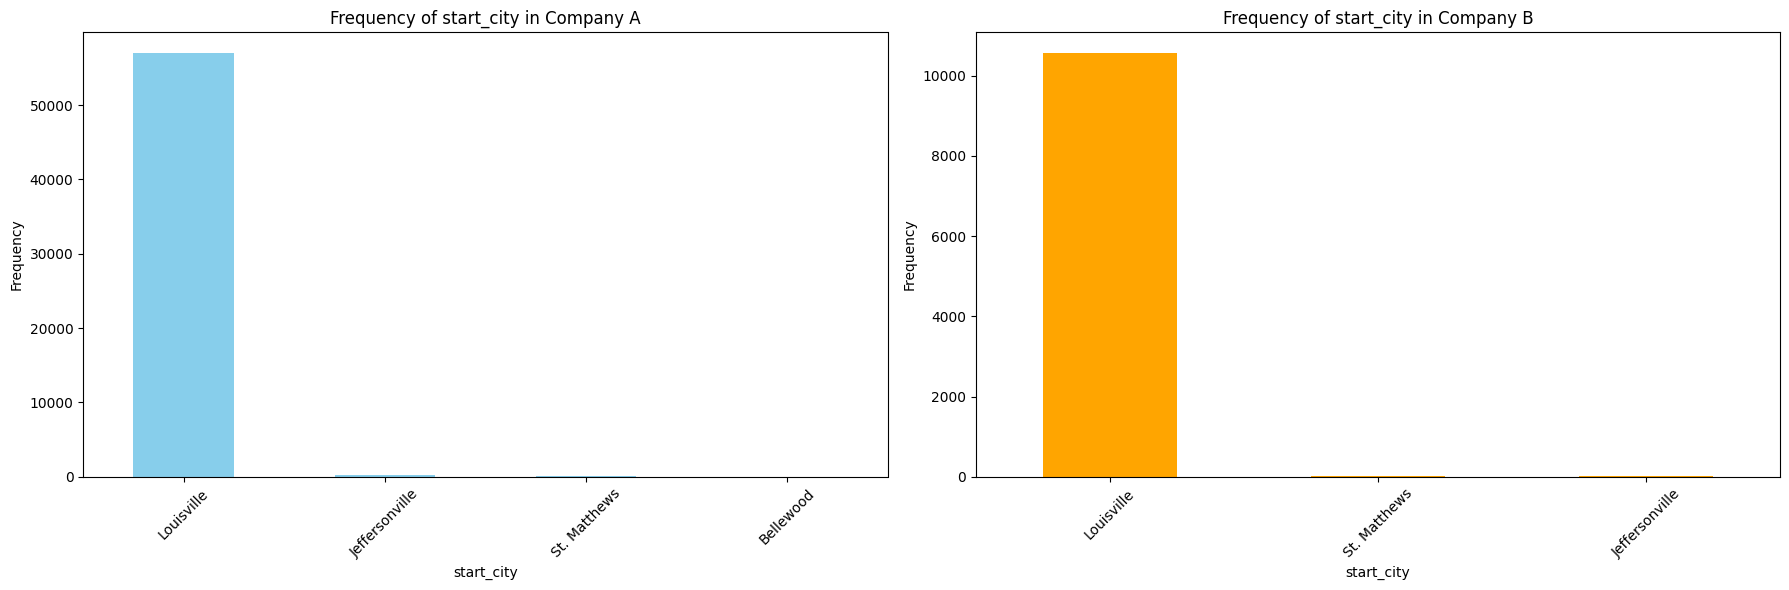

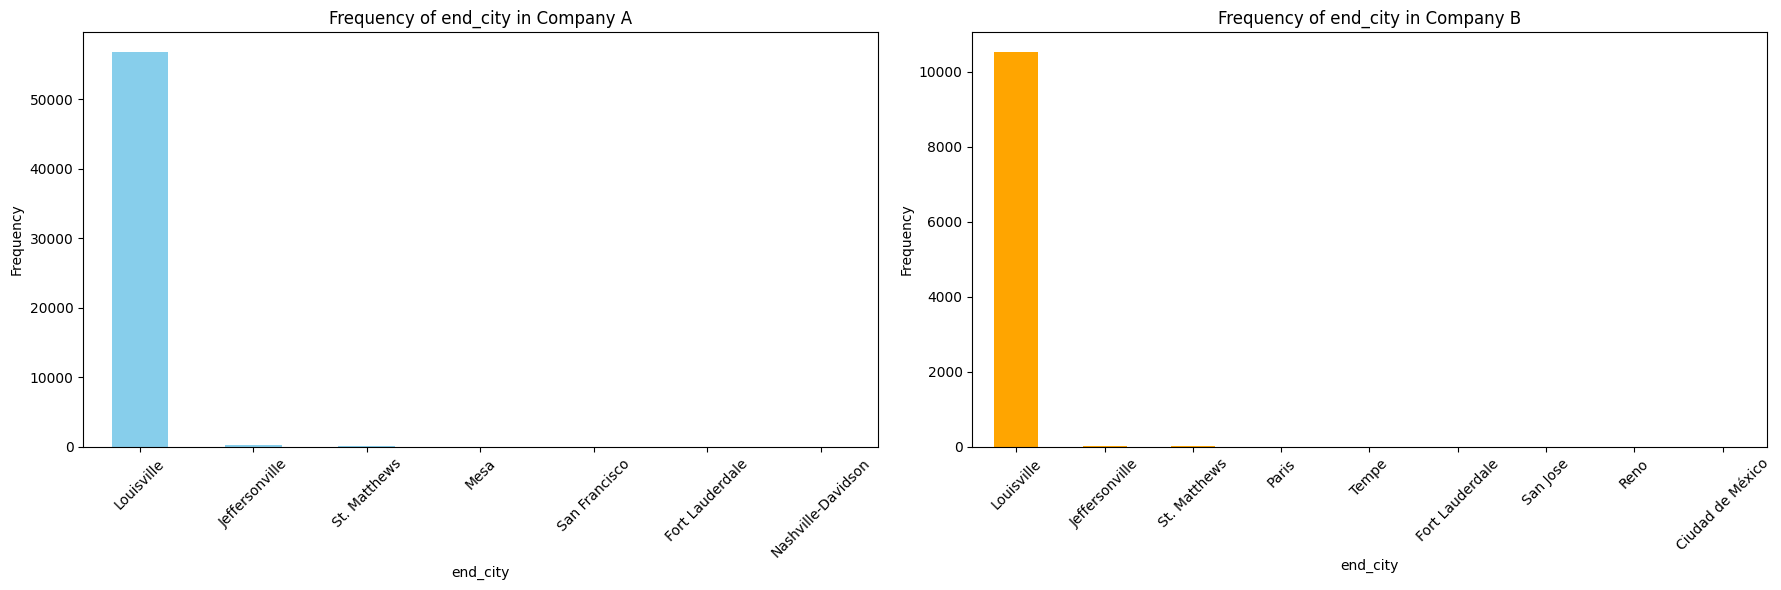

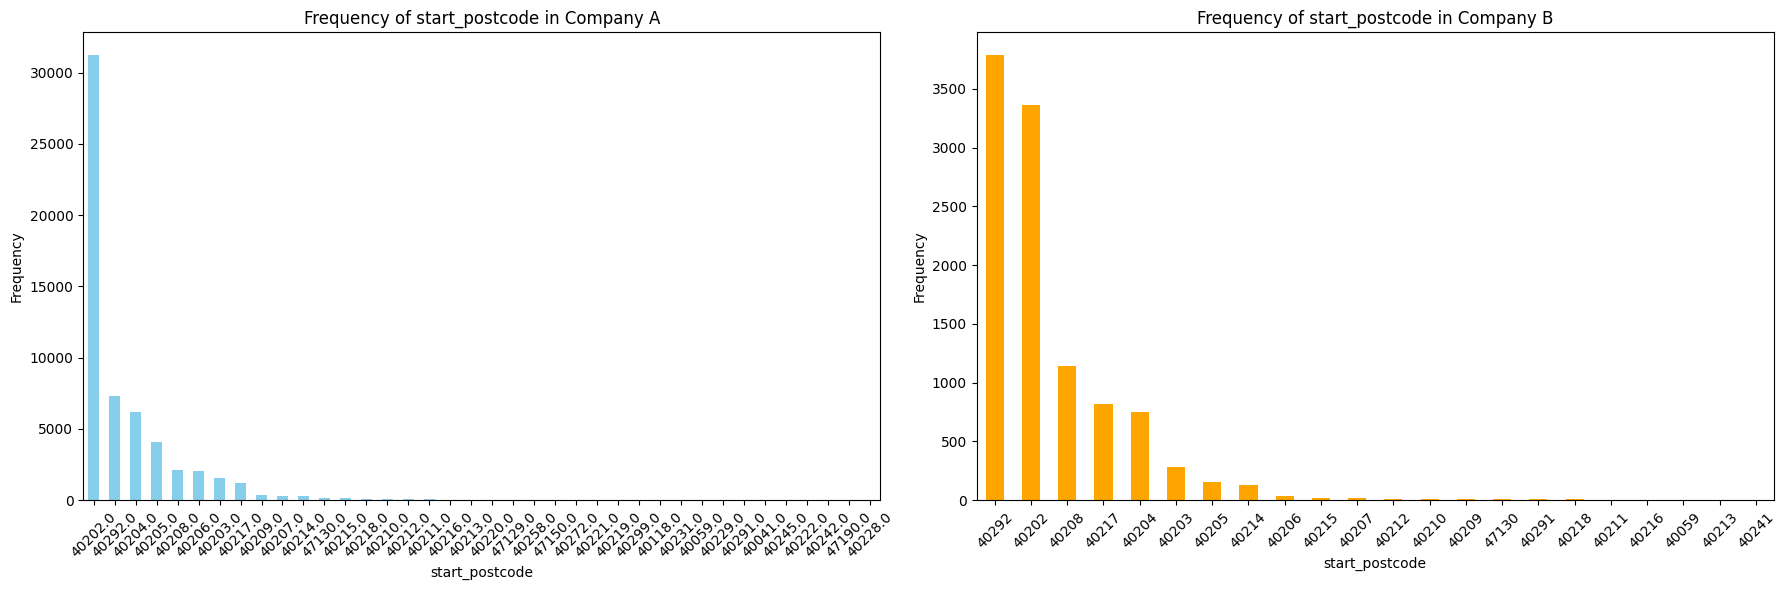

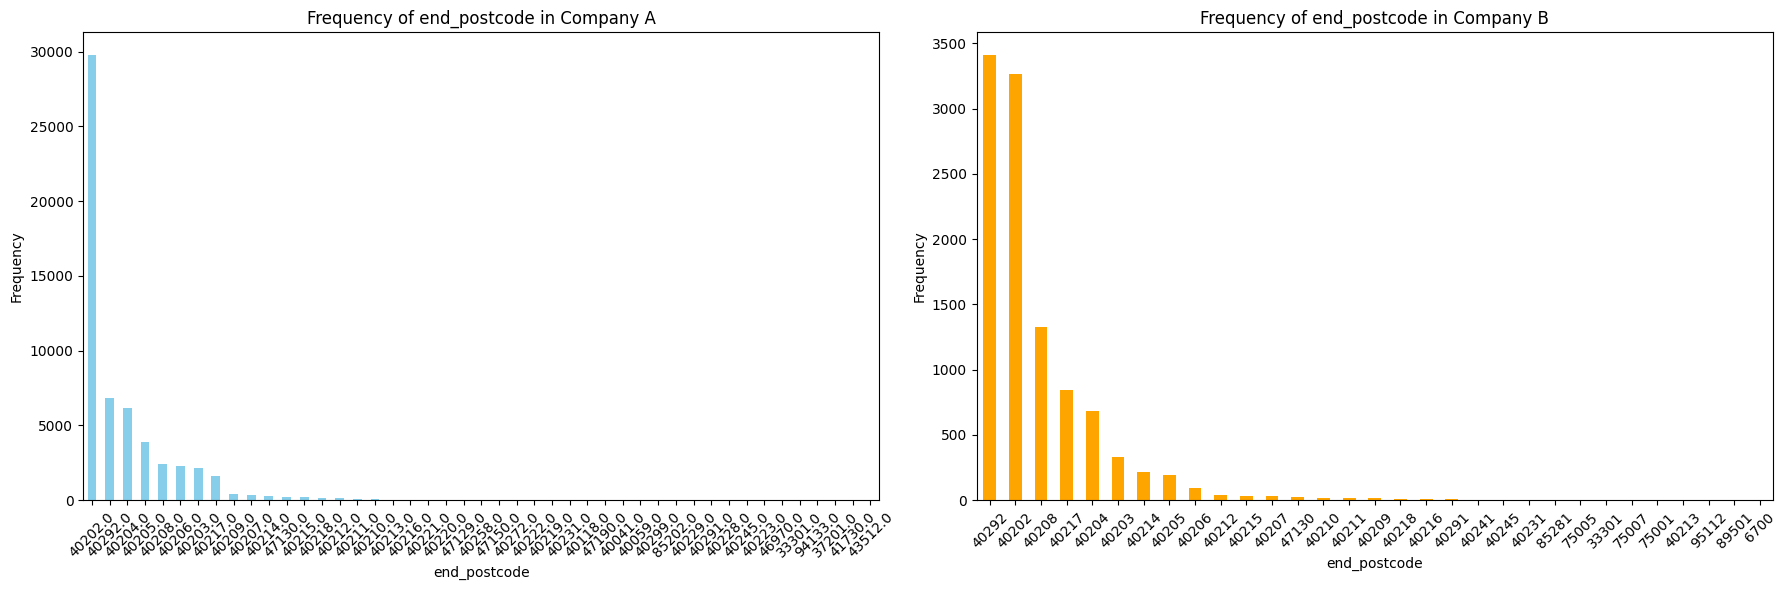

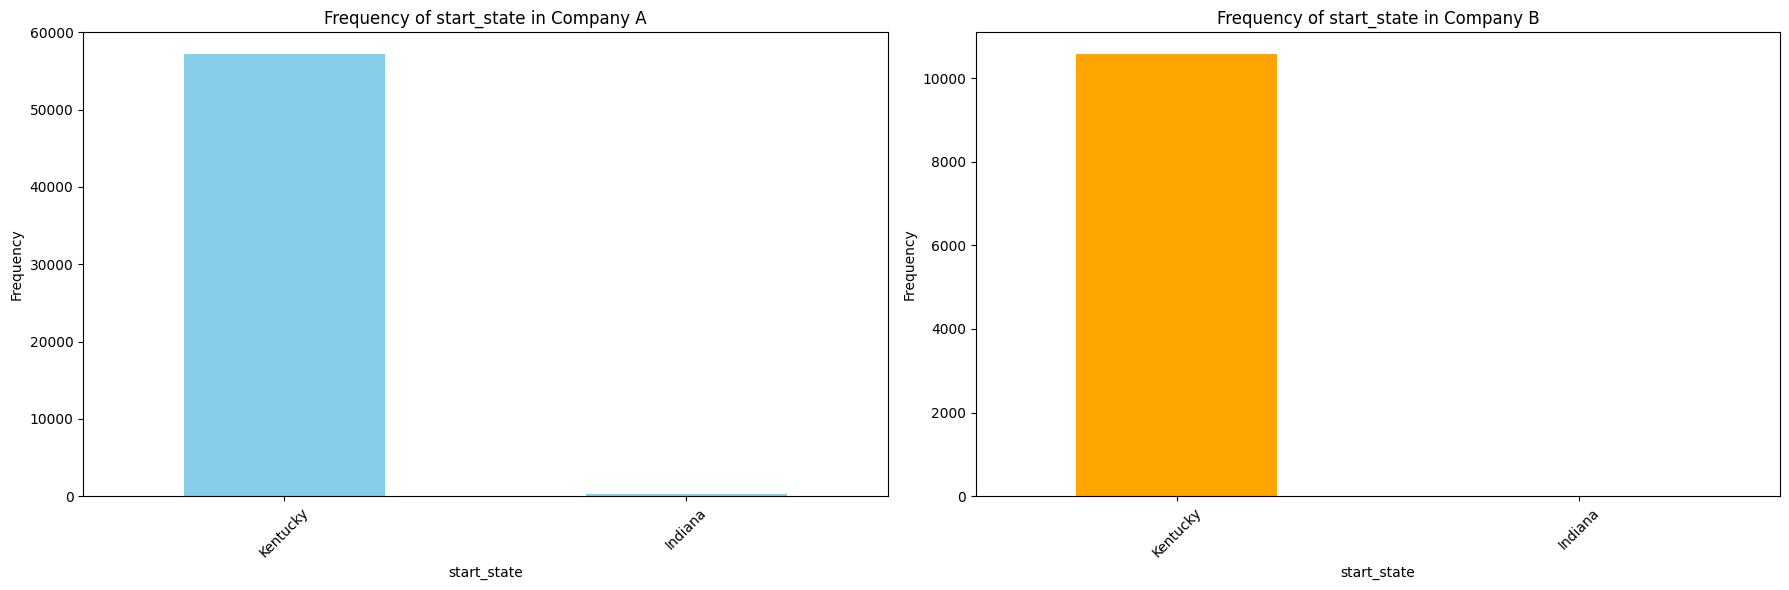

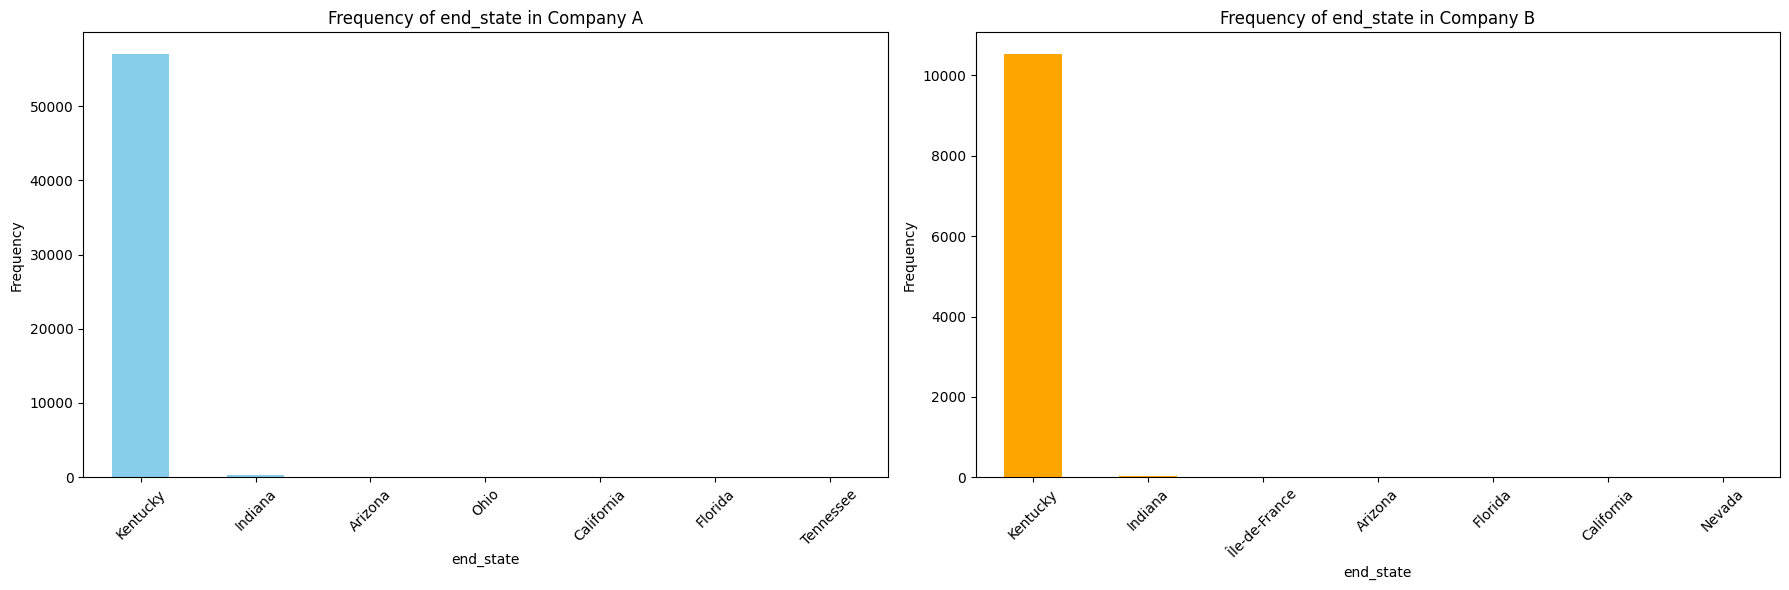

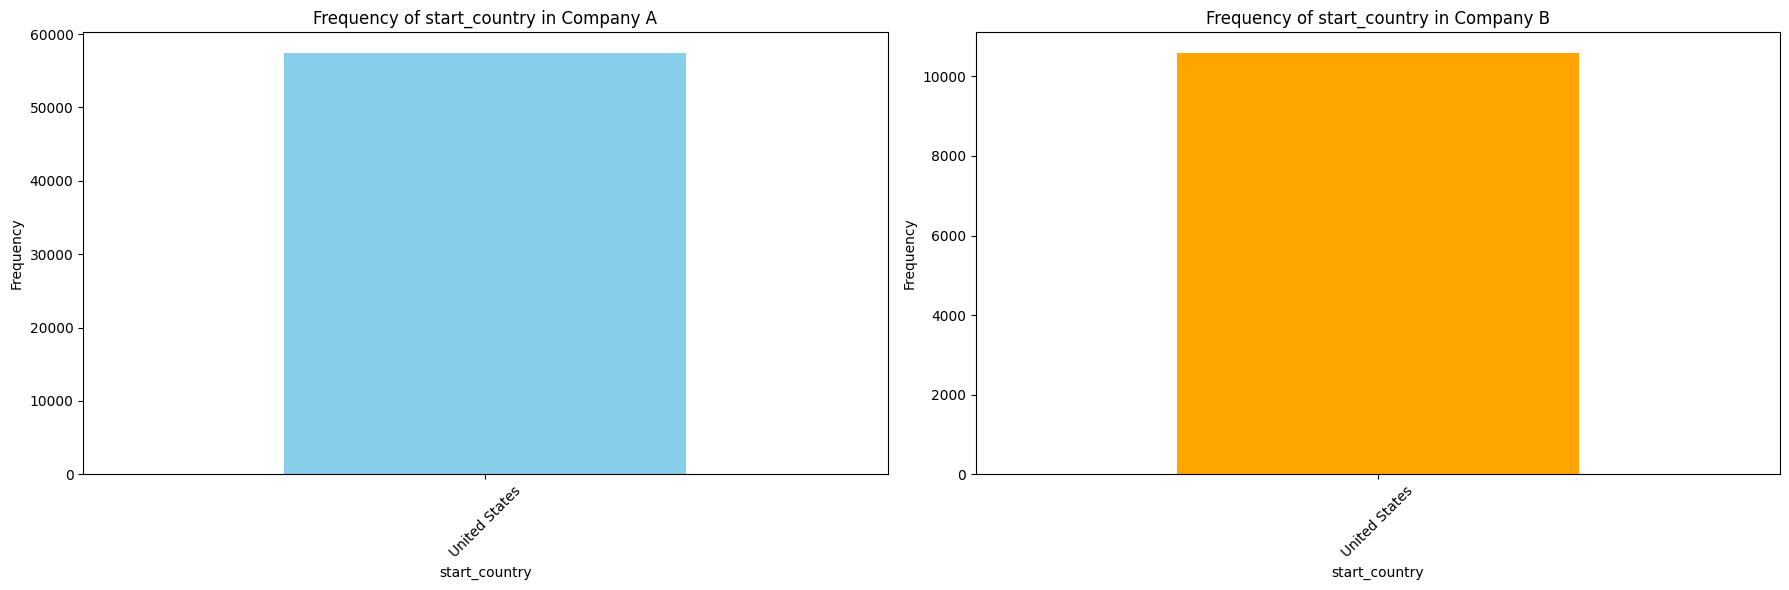

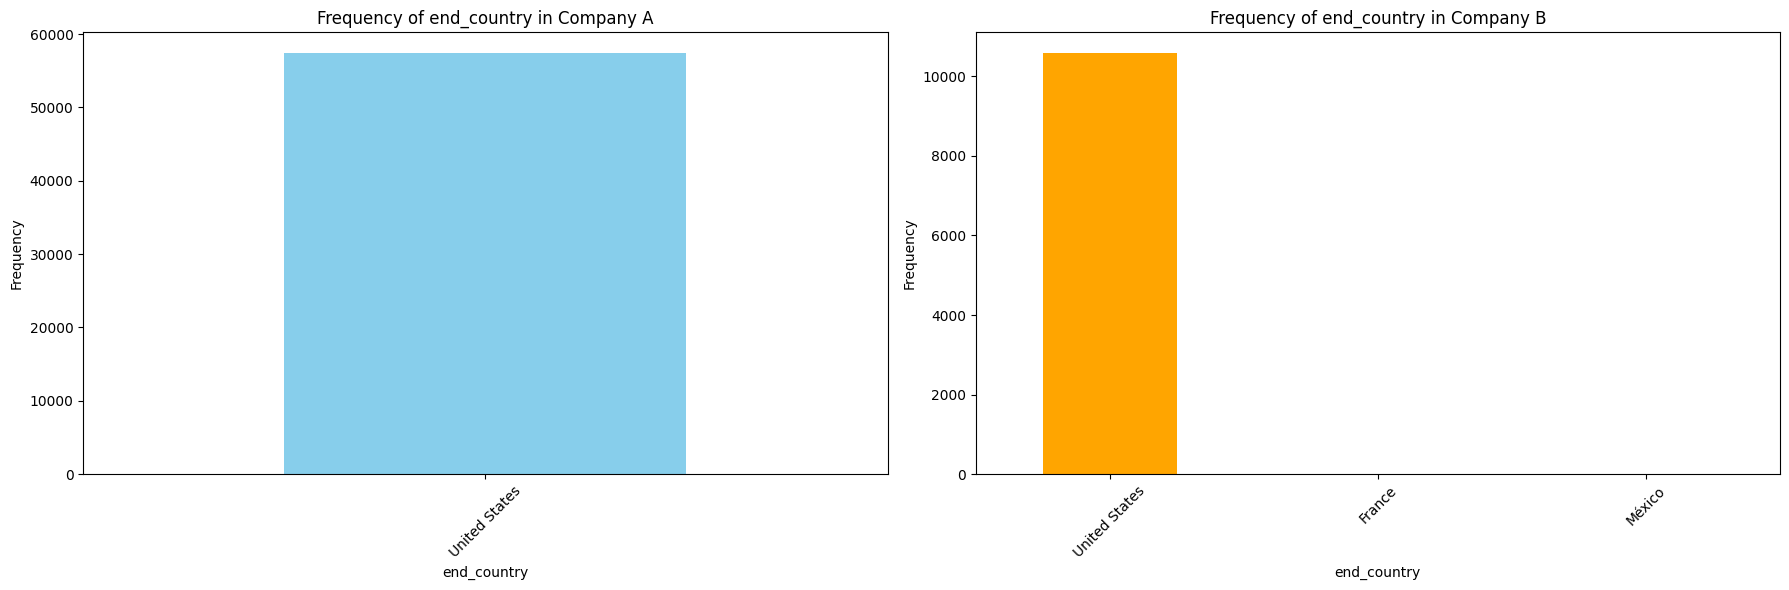

In [ ]:
def plot_value_frequency(column_name):
    # Create a figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(18, 6))

    # Plotting for Company A
    company_a_final[column_name].value_counts().plot(kind='bar', color='skyblue', ax=axs[0])
    axs[0].set_title(f"Frequency of {column_name} in Company A")
    axs[0].set_xlabel(column_name)
    axs[0].set_ylabel('Frequency')
    axs[0].tick_params(axis='x', rotation=45)

    # Plotting for Company B
    company_b_final[column_name].value_counts().plot(kind='bar', color='orange', ax=axs[1])
    axs[1].set_title(f"Frequency of {column_name} in Company B")
    axs[1].set_xlabel(f"{column_name}")
    axs[1].set_ylabel('Frequency')
    axs[1].tick_params(axis='x', rotation=45)

    # Adjust layout to prevent clipping of titles
    plt.tight_layout()

    # Show the plot
    plt.show()


plot_value_frequency('start_city')
plot_value_frequency('end_city')

plot_value_frequency('start_postcode')
plot_value_frequency('end_postcode')

plot_value_frequency('start_state')
plot_value_frequency('end_state')

plot_value_frequency('start_country')
plot_value_frequency('end_country')

In [ ]:
# Suspicious subset - low quality records
suspicious_subset = company_a_final[company_a_final['suspicious']]
print(f"Suspicious Record Count: {len(suspicious_subset)}")
print("Suspicious Subset ScooterID Value Frequency:")
print(suspicious_subset['ScooterID'].value_counts())

suspicious_subset

Suspicious Record Count: 301
Suspicious Subset ScooterID Value Frequency:
ece4a0e2-3fea-4b8c-967e-31359a65bdbe    8
2246419c-9386-4886-bf58-5bfd773d81a4    7
b35da854-aeae-46fe-895d-b155370c137b    5
556aeb48-3d8c-4793-af69-c6a30ad60611    5
8bdc226e-cd06-44af-9d54-7c95b970b9fc    5
                                       ..
e14897e7-f213-41af-be87-2086d3c4dc2e    1
056f0d92-c8b8-4fb1-9a00-c491398a16a4    1
f347f43e-95d3-4109-805b-70104371df9d    1
8e67720b-5f2d-4ee6-83e0-405568839899    1
b3f0017c-1346-4694-a38b-b5558adfcfba    1
Name: ScooterID, Length: 161, dtype: int64


,TripID,ScooterID,StartTime,EndTime,StartLatitude,StartLongitude,EndLatitude,EndLongitude,TripDistance,DayOfWeek,...,end_country,same_display_name,same_city,same_road,same_state,same_postcode,same_country,same_start_and_end,distance_diff,suspicious
154,53579eed-10b3-4000-8820-101545b997c4,a890890a-9292-4ad5-a39f-aa776b26181f,2018-08-09 16:00:00,2018-08-09 16:04:00,38.27,-85.75,38.26,-85.76,0.53,Thursday,...,United States,False,False,False,False,True,True,False,-0.883739,True
702,f61ecab6-7243-4299-a7ea-4203b0546e84,94556dcc-87d3-4783-bc12-30810039631e,2018-08-10 19:30:00,2018-08-10 19:49:00,38.26,-85.73,38.27,-85.74,2.39,Friday,...,United States,False,False,False,False,False,True,False,0.976261,True
703,b0f0cf0a-9256-42a4-aef0-d5adefcd9f3a,2dd803cd-adf7-4ecc-9d33-af77dd5c8275,2018-08-10 19:30:00,2018-08-10 19:49:00,38.26,-85.73,38.27,-85.74,2.43,Friday,...,United States,False,False,False,False,False,True,False,1.016261,True
727,817a5eb9-3f15-4ce9-99e4-6c957f9a481d,71a6a192-a4c0-4cc9-810f-a58c2f59a131,2018-08-10 20:12:00,2018-08-10 20:26:00,38.26,-85.74,38.27,-85.74,1.39,Friday,...,United States,False,False,False,False,False,True,False,0.278049,True
733,13fc24ff-66aa-468a-987a-f58ac22c0f94,2dd803cd-adf7-4ecc-9d33-af77dd5c8275,2018-08-10 20:26:00,2018-08-10 20:45:00,38.27,-85.74,38.25,-85.74,2.10,Friday,...,United States,False,False,False,False,False,True,False,-0.123902,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57255,c4a0ae1b-d57f-4563-9039-74f27e68aebc,a0f3cdde-02a1-4664-8333-cf3d594a2653,2018-10-30 16:25:00,2018-10-30 17:08:00,38.25,-85.74,38.31,-85.71,6.21,Tuesday,...,United States,False,False,False,False,False,True,False,-0.957204,True
57317,1bc26a59-dc13-4e44-8149-57d1bddaa6ba,7ba7541b-f267-498c-bd37-7706e14504ee,2018-10-30 18:32:00,2018-10-30 19:06:00,38.24,-85.72,38.27,-85.74,3.36,Tuesday,...,United States,False,False,False,False,False,True,False,-0.405321,True
57318,1315d155-9124-42e2-b15c-7471ff90b2ad,39c8ba2a-ab6d-4691-a1b0-c17617da86bb,2018-10-30 18:33:00,2018-10-30 19:06:00,38.24,-85.72,38.27,-85.74,3.23,Tuesday,...,United States,False,False,False,False,False,True,False,-0.535321,True
57352,83071927-1d7c-42c3-8c89-5db45b3681dd,7ba7541b-f267-498c-bd37-7706e14504ee,2018-10-30 20:04:00,2018-10-30 20:24:00,38.27,-85.74,38.26,-85.72,2.67,Tuesday,...,United States,False,False,False,False,False,True,False,0.599897,True


In [ ]:
# Suspicious subset - low quality records
suspicious_subset = company_b_final[company_a_final['suspicious']]
print(f"Suspicious Record Count: {len(suspicious_subset)}")

suspicious_subset

Suspicious Record Count: 101


<ipython-input-29-2db743288616>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  suspicious_subset = company_b_final[company_a_final['suspicious']]


,trip_id,start_time,completed_time,distance_meters,start_latitude,start_longitude,end_latitude,end_longitude,StartTime,DayOfWeek,...,end_country,same_display_name,same_city,same_road,same_state,same_postcode,same_country,same_start_and_end,distance_diff,suspicious
154,31453743,2018-12-29 12:27:16+00:00,2018-12-29 12:39:32+00:00,1675,38.26,-85.76,38.26,-85.76,2018-12-29 12:27:16+00:00,Saturday,...,United States,True,True,True,True,True,True,True,1675.000000,False
702,31081348,2018-12-27 13:01:53+00:00,2018-12-27 13:09:04+00:00,990,38.26,-85.75,38.26,-85.75,2018-12-27 13:01:53+00:00,Thursday,...,United States,True,True,True,True,True,True,True,990.000000,False
703,31904111,2018-12-31 19:31:07+00:00,2018-12-31 19:33:00+00:00,143,38.22,-85.76,38.22,-85.76,2018-12-31 19:31:07+00:00,Monday,...,United States,True,True,True,True,True,True,True,143.000000,False
727,31086208,2018-12-27 13:27:41+00:00,2018-12-27 13:30:35+00:00,114,38.21,-85.76,38.21,-85.76,2018-12-27 13:27:41+00:00,Thursday,...,United States,True,True,False,True,True,True,True,114.000000,False
733,31089644,2018-12-27 13:45:41+00:00,2018-12-27 13:55:02+00:00,578,38.26,-85.75,38.25,-85.75,2018-12-27 13:45:41+00:00,Thursday,...,United States,False,True,False,True,True,True,False,576.888049,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9005,33535062,2019-01-10 11:06:56+00:00,2019-01-10 11:08:53+00:00,0,38.21,-85.76,38.22,-85.76,2019-01-10 11:06:56+00:00,Thursday,...,United States,False,True,False,True,True,True,False,-1.111951,False
9756,32834158,2019-01-06 09:13:30+00:00,2019-01-06 09:22:04+00:00,1768,38.23,-85.76,38.22,-85.76,2019-01-06 09:13:30+00:00,Sunday,...,United States,False,True,False,True,False,True,False,1766.888049,False
9832,36900438,2019-01-28 03:58:53+00:00,2019-01-28 04:02:10+00:00,418,38.25,-85.76,38.25,-85.76,2019-01-28 03:58:53+00:00,Monday,...,United States,True,True,True,True,True,True,True,418.000000,False
9996,33027698,2019-01-07 12:02:32+00:00,2019-01-07 12:07:21+00:00,775,38.21,-85.77,38.22,-85.76,2019-01-07 12:02:32+00:00,Monday,...,United States,False,True,False,True,False,True,False,773.585890,False


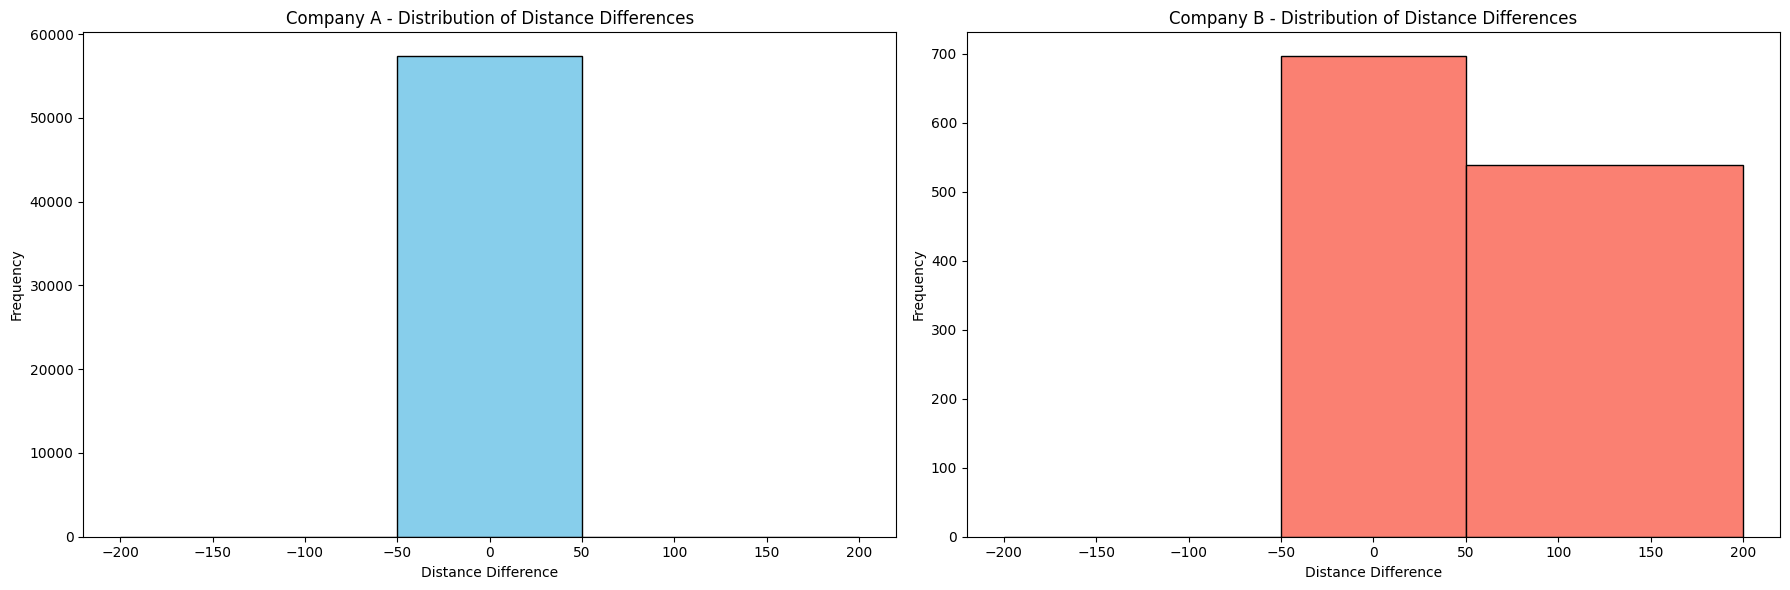

In [ ]:
def plot_distribution(column_name)
    # Define custom bins
    bins = [-float('inf'), -200, -50, 50, 200, float('inf')]

    # Create a figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(18, 6))

    # Plotting histogram for company_a_final
    axs[0].hist(company_a_final[column_name], bins=bins, color='skyblue', edgecolor='black')
    axs[0].set_title(f"Company A - Distribution of {column_name}")
    axs[0].set_xlabel('Distance Difference')
    axs[0].set_ylabel('Frequency')

    # Plotting histogram for company_b_final
    axs[1].hist(company_b_final[column_name], bins=bins, color='salmon', edgecolor='black')
    axs[1].set_title(f"Company B - Distribution of {column_name}")
    axs[1].set_xlabel('Distance Difference')
    axs[1].set_ylabel('Frequency')

    # Adjust layout to prevent clipping of titles
    plt.tight_layout()

    # Show the plot
    plt.show()

plot_distribution('distance_diff')
plot_distribution('distance_diff')

# Conclusion 6


*   Company B `end_country` field contains points in 'France' and 'Mexico', but there is only one distinct value (US) in `start_country` field
*   It appears that Company A's scooters are commonly found operating in the area with postcode `40202`, whereas Company B's scooters tend to operate predominantly in the area with postcode `40292`
*   There are three fields in dataframe: `distance`, `distance_calculated` and `distance_diff`. `sistance` is provided by data supplier, `distance_caluclated` is calculated using available starting and ending point and `distance_diff` shows the diff between these two fields. Base on the distance difference distribution, Company A provided more precise information, but it should be noted that geometry accuracy for both companies is very low.



# Estimate the number of scooters in Company B
## Approach 1
A simple approach where it is possible to use the **average** number of trips per scooter in Company A to estimate the number of scooters in Company B.

## Approach 2 - Future Work
* Consider Scooter Movement Patterns:
  * Calculate the unique start and end locations for each scooter in Company A.
  * Analyze the patterns of movement, considering whether scooters tend to move between specific areas or follow specific routes.

In [ ]:
# Approach 1

# Determine the number of scooters for Company A
num_scooters_company_a = company_a_final['ScooterID'].nunique()

# Determine the total number of trips for Company A
total_trips_company_a = len(company_a_final)

# Calculate the average number of trips per scooter in Company A
average_trips_per_scooter_company_a = total_trips_company_a / num_scooters_company_a

# Estimate the number of scooters for Company B based on the average trips per scooter in Company A
estimated_num_scooters_company_b = len(company_b_final) / average_trips_per_scooter_company_a
estimated_num_scooters_company_b = int(round(estimated_num_scooters_company_b, 2))

# Print the results
print(f"Company A operates {num_scooters_company_a} scooters.")
print(f"Company B estimated to operate approximately {estimated_num_scooters_company_b} scooters based on Company A's behavior.")

Company A operates 858 scooters.
Company B estimated to operate approximately 158 scooters based on Company A's behavior.


# Summary
* Company A Record Count: 57k
* Company B Record Count: 11k


## Data Quality Assessment
* Company A Suspicious Record Count: 301 (0.5%)
* Company B Suspicious Record Count: 101 (1%)


## Number of Scooters
* Company A: 858 scooters.
* Company B [***Estimation***]: approximately 158 scooters

# Additional Analysis
* Interactive map available [here](https://api.maptiler.com/maps/aec374dd-2fa1-4412-af05-9e670ef9b914/?key=GMjGWFa5ehPRAbrGuDHN#10.8/38.22925/-85.71668) (Credits to MapTiler).
  * More detail: Available Starting and Ending Points are converted from `CSV` to `GeoJSON` file and then converted to `.mbtiles` format using MapTiler Engine app, published the tiles to MapTiler Cloud and designed a new map with Starting and Ending layers for both Company A and Company B.
  * Legend:
    * Yellow - Company A start
    * Green - Company A end
    * Black - Company B start
    * Red - Company B end

# Future work
*   Provide in-depth analysis of available data
*   Implement more complex algorithms for number of scooters estimation

